In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [23]:
# read dataset from csv file
base_dir = Path.cwd().parent
data_file_path = base_dir/"data"/"adult.csv"
absolute_data_file_path = data_file_path.resolve()

data = pd.read_csv(absolute_data_file_path)

# remove all rows, which contains "?"
data = data[~data.map(lambda x: "?" in str(x)).any(axis=1)]

# check for data correctness (salary & salary $K)
condition_1 = (data["salary"] == "<=50K") & (data["salary K$"] <= 50)
condition_2 = (data["salary"] == ">50K") & (data["salary K$"] > 50)
correct = condition_1 | condition_2
incorrect = len(data) - correct.sum()
print(f"Number of incorrect values: {incorrect}")


Number of incorrect values: 0


# Task 1
Print the count of men and women in the dataset.

In [44]:
gender_counts = data["sex"].value_counts()

men = gender_counts.get("Male", 0)
women = gender_counts.get("Female", 0)

print(f"Number of men: {men}")
print(f"Number of women: {women}")

Number of men: 20380
Number of women: 9782


# Task 2
Find the average age of men in dataset

In [45]:
# write your code for task 2 here
males_only = data[data["sex"] == "Male"]
average_age_men = males_only["age"].mean()
print(f"The average age of men is: {average_age_men:.2f}")


The average age of men is: 39.18


# Task 3
Get the percentage of people from Poland (native-country)

In [46]:
# write your code for task 3 here
countries = data["native-country"].value_counts()
poland_percentage = countries["Poland"] / len(data) * 100
print(f"The percentage of people from Poland: {poland_percentage:.2f}%")


The percentage of people from Poland: 0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [47]:
# write your code for task 4 here
more_50K = data[data["salary"] == ">50K"]
mean_age_more_50K = more_50K["age"].mean()
std_age_more_50K = more_50K["age"].std()

print(f"The mean of the age who earn > 50K: {mean_age_more_50K:.1f}")
print(f"The standard deviation of the age who earn > 50K: {std_age_more_50K:.1f}")

less_50K = data[data["salary"] == "<=50K"]
mean_age_less_50K = less_50K["age"].mean()
std_age_less_50K = less_50K["age"].std()

print(f"The mean of the age who earn <= 50K: {mean_age_less_50K:.1f}")
print(f"The standard deviation of the age who earn <= 50K: {std_age_less_50K:.1f}")


The mean of the age who earn > 50K: 44.0
The standard deviation of the age who earn > 50K: 10.3
The mean of the age who earn <= 50K: 36.6
The standard deviation of the age who earn <= 50K: 13.5


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [48]:
# write your code for task 5 here
high_education = [
    "Bachelors",
    "Prof-school",
    "Assoc-acdm",
    "Assoc-voc",
    "Masters",
    "Doctorate"
]
non_high_education = data[~data["education"].isin(high_education)]
more_50K_salary = non_high_education[non_high_education["salary"] == ">50K"].shape[0]
print(f"The number of people without higher education, but with > 50K salary: {more_50K_salary}")


The number of people without higher education, but with > 50K salary: 3178


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [49]:
# write your code for task 6 here
age_statistics = data.groupby("education")["age"].describe()
print(age_statistics)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [51]:
# write your code for task 7 here
men = data[data["sex"] == "Male"]

married_men = men[men["marital-status"].str.startswith("Married")]
non_married_men = men[~men["marital-status"].str.startswith("Married")]

married_men_salary = married_men["salary"].value_counts()
non_married_men_salary = non_married_men["salary"].value_counts()

print("Salary distribution for married men:")
print(married_men_salary)

print("\nSalary distribution for non-married men:")
print(non_married_men_salary)

percent_married_men_high_salary = (
    married_men[married_men["salary"] == ">50K"].shape[0] 
    / married_men.shape[0]
    ) * 100
percent_non_married_men_high_salary = (
    non_married_men[non_married_men["salary"] == ">50K"].shape[0]
    / non_married_men.shape[0]
    ) * 100

print(f"\nPercentage of married men earning >50K: {percent_married_men_high_salary:.2f}%")
print(f"Percentage of non-married men earning >50K: {percent_non_married_men_high_salary:.2f}%")


Salary distribution for married men:
salary
<=50K    7052
>50K     5723
Name: count, dtype: int64

Salary distribution for non-married men:
salary
<=50K    6932
>50K      673
Name: count, dtype: int64

Percentage of married men earning >50K: 44.80%
Percentage of non-married men earning >50K: 8.85%


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [52]:
# write your code for task 8 here
max_hours = data.groupby("workclass").agg({"hours-per-week": "max"})
max_hours = max_hours.rename(columns={"hours-per-week": "Max hours per week"})
print(max_hours)

hours_count = data.groupby("hours-per-week").size().reset_index(name="Number of people")
hours_count.rename(columns={"hours-per-week": "Hours per Week"}, inplace=True)
print(f"\n{hours_count}")


                  Max hours per week
workclass                           
Federal-gov                       99
Local-gov                         99
Private                           99
Self-emp-inc                      99
Self-emp-not-inc                  99
State-gov                         99
Without-pay                       65

    Hours per Week  Number of people
0                1                 7
1                2                15
2                3                24
3                4                27
4                5                38
..             ...               ...
89              95                 2
90              96                 5
91              97                 2
92              98                11
93              99                78

[94 rows x 2 columns]


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

                Unnamed: 0       age  hours-per-week  salary K$
Unnamed: 0        1.000000 -0.001126       -0.001890   0.000129
age              -0.001126  1.000000        0.101599   0.208203
hours-per-week   -0.001890  0.101599        1.000000   0.196378
salary K$         0.000129  0.208203        0.196378   1.000000


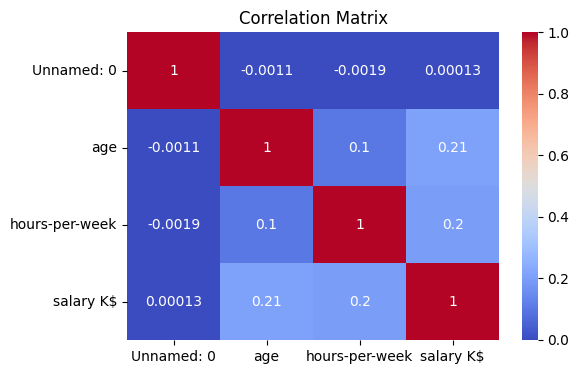

In [53]:
# write your code for task 9 here
correlation_matrix = data.corr(numeric_only = True)
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
